In [1]:
from training import get_train_test_data
from datetime import datetime
import pandas as pd
from get_heston_parameters import infer_heston_parameters
from neural_heston import Heston
import matplotlib.pyplot as plt
from IPython.display import clear_output
plt.style.use('dark_background')

In [2]:
STOCK_NAME = "MSFT"
START = datetime(2015, 1, 1)
TEST_START = datetime(2023, 1, 1)
END = datetime(2024, 1, 1)
PREDICITON_PERIOD = 60
NUM_SIMULATIONS = 16
DT = 1

In [3]:
train_data, test_data = get_train_test_data(STOCK_NAME, START, TEST_START, PREDICITON_PERIOD)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# weight initialisation
all_parameters = []
for trajectory in train_data:
    parameters = infer_heston_parameters(trajectory)
    all_parameters.append(parameters)
all_parameters = pd.DataFrame(all_parameters)
initial_parameters = dict(all_parameters.mean())

In [5]:
neural_heston = Heston(**initial_parameters)

In [6]:
all_predictions = []

for trajectory in test_data:
    predictions = neural_heston.predict(trajectory, num_simulations=NUM_SIMULATIONS, dt=DT)
    all_predictions.append(predictions)

clear_output()

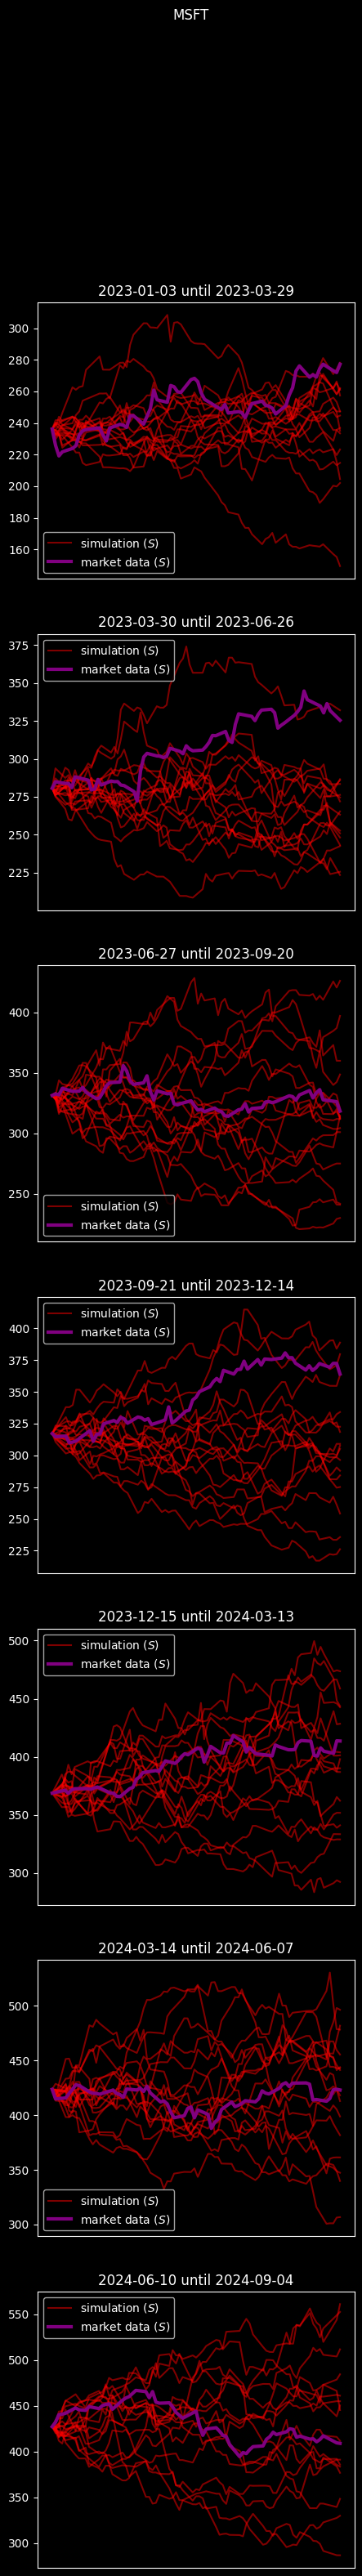

In [7]:
fig, axs = plt.subplots(len(test_data), 1)
fig.set_size_inches(5, 36)
fig.suptitle(STOCK_NAME)

for i, trajectory in enumerate(test_data):
    predictions = neural_heston.predict(trajectory, num_simulations=NUM_SIMULATIONS, dt=DT)
    for j, prediction in enumerate(predictions[..., 0].transpose(0, 1)):
        axs[i].plot(trajectory.index, prediction, c="red", alpha=.5, label="simulation ($S$)" if j == 0 else None)
    axs[i].plot(trajectory.index, list(trajectory["S"]), c="purple", linewidth=3, label="market data ($S$)")
    axs[i].set_title(f"{trajectory.index[0].date()} until {trajectory.index[-1].date()}")
    axs[i].legend()
    axs[i].set_xticks([])

clear_output()
plt.show()